Text(0.5, 1.0, 'Hierarchical ')

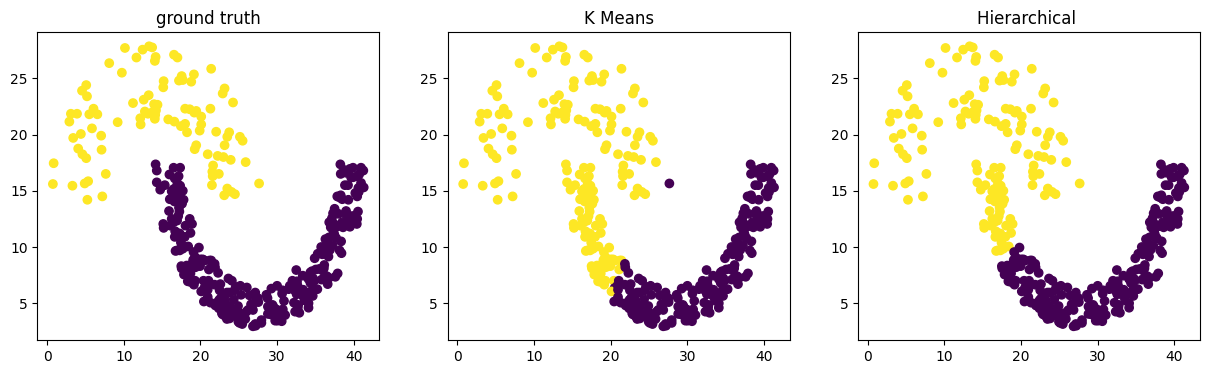

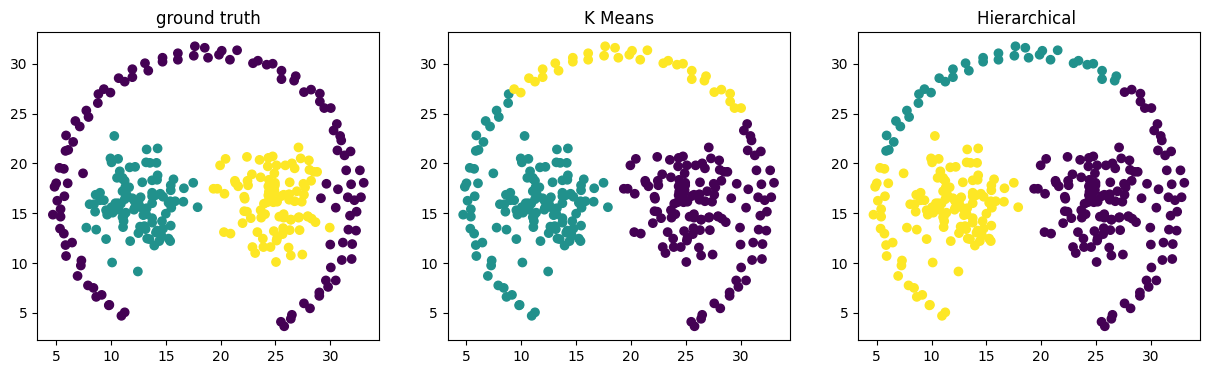

In [41]:
#1
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,AgglomerativeClustering
import matplotlib.pyplot as plt

pathbased=pd.read_excel("Pathbased.xlsx",header=None)
toy=pd.read_excel("Toy.xlsx",header=None)
#ground truth for toy has 2 labels and for pathbased has 3 labels 

pathmodelk=KMeans(n_clusters=3,random_state=0,n_init="auto")
toymodelk=KMeans(n_clusters=2,random_state=0,n_init="auto")

pathmodelh=AgglomerativeClustering(n_clusters=3)
toymodelh=AgglomerativeClustering(n_clusters=2)

Xpath=pathbased.drop(columns=2)
ypath=pathbased[2]
Xtoy=toy.drop(columns=2)
ytoy=toy[2]

pathmodelk.fit(Xpath)
toymodelk.fit(Xtoy)

pathmodelh.fit(Xpath)
toymodelh.fit(Xtoy)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(Xtoy[0],Xtoy[1],c=ytoy)
plt.title("ground truth")
plt.subplot(1,3,2)
plt.scatter(Xtoy[0],Xtoy[1],c=toymodelk.labels_)
plt.title("K Means")
plt.subplot(1,3,3)
plt.scatter(Xtoy[0],Xtoy[1],c=toymodelh.labels_)
plt.title("Hierarchical ")

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(Xpath[0],Xpath[1],c=ypath)
plt.title("ground truth")
plt.subplot(1,3,2)
plt.scatter(Xpath[0],Xpath[1],c=pathmodelk.labels_)
plt.title("K Means")
plt.subplot(1,3,3)
plt.scatter(Xpath[0],Xpath[1],c=pathmodelh.labels_)
plt.title("Hierarchical ")

In [86]:
#2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,rand_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA

encoder=LabelEncoder()
df=pd.read_csv("Shop.csv")
df.head()
for i in df.columns:
    if df[i].dtype==object:
        df[i]=encoder.fit_transform(df[i])
        
df.head()
sscores=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i).fit(df)
    labels=kmeans.labels_
    sscore=silhouette_score(df,labels,metric='euclidean')
    print("clusters=",i,"silhouette score=",sscore)
    sscores.append(sscore)
    
print("\nhighest silhouette score is",max(sscores),"which is for clusters= 2")
print("hence we use n_clusters=2 for clustering")
#rand index cant be calculated as ground truth is not given

#extracting principal components
pca=PCA(n_components=0.95)
newdf=pca.fit_transform(df)
newdf=pd.DataFrame(newdf)
newdf.head()

#applying kmeans on this 
print('\n')
sscoresnew=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i).fit(newdf)
    labels=kmeans.labels_
    sscore=silhouette_score(newdf,labels,metric='euclidean')
    print("clusters=",i,"silhouette score=",sscore)
    sscoresnew.append(sscore)
print('\n')
print("highest silhouette score is:",max(sscoresnew),"for clusters=2 again")

clusters= 2 silhouette score= 0.4793049017423563
clusters= 3 silhouette score= 0.3766801400675223
clusters= 4 silhouette score= 0.4215331184039924
clusters= 5 silhouette score= 0.3591700041568933
clusters= 6 silhouette score= 0.41079389332797134
clusters= 7 silhouette score= 0.34656716673128757
clusters= 8 silhouette score= 0.36374037038772317
clusters= 9 silhouette score= 0.37991592928064044
clusters= 10 silhouette score= 0.3648011635432455

highest silhouette score is 0.4793049017423563 which is for clusters= 2
hence we use n_clusters=2 for clustering


clusters= 2 silhouette score= 0.5057717459274719
clusters= 3 silhouette score= 0.41191938542737844
clusters= 4 silhouette score= 0.4680519526014724
clusters= 5 silhouette score= 0.4422107511317765
clusters= 6 silhouette score= 0.48271548133207715
clusters= 7 silhouette score= 0.4726543496187922
clusters= 8 silhouette score= 0.4492378864324734
clusters= 9 silhouette score= 0.47409612410240726
clusters= 10 silhouette score= 0.4419022039